# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Regression
### VIDEO: Logistic regression
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

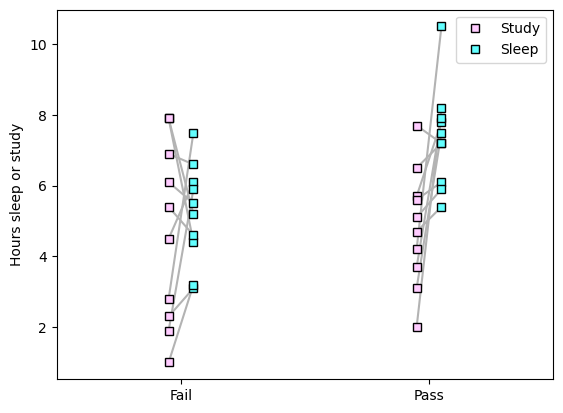

In [2]:
## generate the data

# first ten are the individuals who failed, second 10 (1s) are individuals who passed
exam_outcome = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# how many hours these individuals spent studying and sleeping:
study_hours  = [7.9, 7.9, 2.8, 5.4, 6.1, 4.5, 6.9, 2.3, 1.9, 1, 3.1, 5.7, 5.6, 4.7, 4.2, 2, 7.7, 6.5, 5.1, 3.7]
sleep_hours  = [4.4, 5.2, 7.5, 4.6, 5.5, 6.1, 6.6, 3.1, 5.9, 3.2, 7.5, 7.8, 6.1, 5.4, 10.5, 8.2, 7.2, 7.2, 5.9, 7.9]

n = len(exam_outcome) # 20 students

# and plot
for i in range(n):
    # show lines to pair the study and sleep square points for one individual
    plt.plot([exam_outcome[i]-.05, exam_outcome[i]+.05],[study_hours[i],sleep_hours[i]],color=[.7,.7,.7])

plt.plot(exam_outcome-.05*np.ones(n),study_hours,'ks',markerfacecolor=[1,.8,1],label='Study')
plt.plot(exam_outcome+.05*np.ones(n),sleep_hours,'ks',markerfacecolor=[.39,1,1],label='Sleep')

plt.xticks([0,1],labels=('Fail','Pass'))
plt.xlim([-.5,1.5])
plt.ylabel('Hours sleep or study')
plt.legend()
plt.show()

In [5]:
## now for the logistic regression

# create a model
logregmodel = LogisticRegression(solver='newton-cg')#'liblinear')
# there are multiple algorithms to use as the solver- the newton-cg works better for binary logistic regressions
# you'll see the avg accuracy is .7 with liblinear and .75 with newton-cg

# create the design matrix
# note that we do not add an intercept term because the LogisticRegresson fn adds it for us.
# (there is no sleepxstudy interaction term because wejust aren't interested in it in this experiment)
desmat = np.vstack((study_hours,sleep_hours)).T

# fit the model with the LogisticRegression instance passing in the design matrix and the dependent variable (exam outcomes)
logregmodel.fit(desmat,np.array(exam_outcome))

print(logregmodel.intercept_) # the intercept generated by the logregmodel
print(logregmodel.coef_) # beta coefficients for the model resulting from log regression for the two params we have (study and sleep)

[-7.1649154]
[[0.10794965 1.05178489]]


In [6]:
# compute predictions and accuracy

# predictions whether they pass or failed
predvals = logregmodel.predict(desmat) # class labels
# the actual probability values from the output
predvalsP = logregmodel.predict_proba(desmat) # probability values

print(predvals)                # predictions
print(np.array(exam_outcome))  # actuals

# notice how the third prediction is wrong, etc.

print(predvalsP)               # probabilities
# [probability student passed    probability student failed]

logregmodel.score(desmat,np.array(exam_outcome)) # average accuracy

[0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[[0.84346776 0.15653224]
 [0.69906128 0.30093872]
 [0.26391272 0.73608728]
 [0.85116615 0.14883385]
 [0.67296049 0.32703951]
 [0.56543607 0.43456393]
 [0.37245072 0.62754928]
 [0.97481743 0.02518257]
 [0.68011062 0.31988938]
 [0.9756662  0.0243338 ]
 [0.25766981 0.74233019]
 [0.16052598 0.83947402]
 [0.53606465 0.46393535]
 [0.72669404 0.27330596]
 [0.01296804 0.98703196]
 [0.15767633 0.84232367]
 [0.22458431 0.77541569]
 [0.24794388 0.75205612]
 [0.60081002 0.39918998]
 [0.17601271 0.82398729]]


0.75

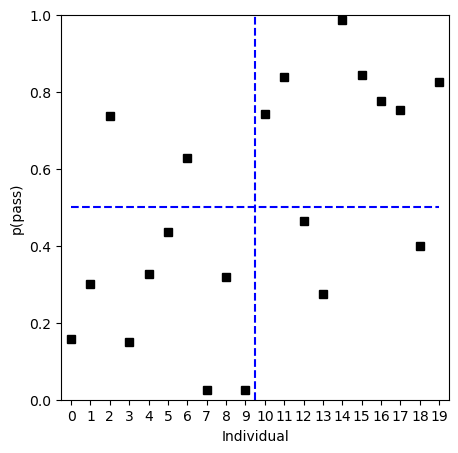

In [7]:
# plotting - visualizing a logistic regression result see https://www.udemy.com/course/statsml_x/learn/lecture/20225734#content at timestamp 9:05

fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(predvalsP[:,1],'ks')
ax.plot([0,19],[.5,.5],'b--')
ax.plot([9.5,9.5],[0,1],'b--')

ax.set_xticks(np.arange(20))
ax.set_xlabel('Individual')
ax.set_ylabel('p(pass)')
ax.set_xlim([-.5, 19.5])
ax.set_ylim([0,1])
plt.show()